#                                    Google Analytics KPI Analysis


In [226]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import nltk
from scipy.stats.stats import pearsonr
import os

import codecs
import re
import copy
import collections
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
#from __future__ import division
import matplotlib

%matplotlib inline

### Data Preprocessing

In [227]:
#define working directory
os.chdir('/Applications/Documents/Kaggle/')

In [228]:
GAdata = pd.read_csv('GAdata1.csv')
CalendarDimension = pd.read_csv('Calendar.csv')

In [229]:
GAdata.head()

,Property,Date,Session,Users,PageViews,Pages/Session,Avg. Sessions Duration,Bounce Rate,% New Sessions,Social,Organic Search,Direct,Email,Paid,Link Exchange,Mobile,Tablet,Desktop,Unnamed: 18,Unnamed: 19
0,WomensForum.com,1/1/14,25612320,18629275,71543837,2.79,0.002234,0.6059,0.6064,1155915,16888909,4667493,26004,83864,89667,9778506,3573965,12259849,NaN,NaN
1,AllParenting.com,1/1/14,405277,361334,1368392,3.38,0.001296,0.7572,0.8461,88744,153555,73226,1123,18,7230,165286,65642,174349,NaN,NaN
2,DrinksMixer.com,1/1/14,4761748,3878349,10625942,2.23,0.000856,0.7471,0.7201,29605,2388659,1047726,5,0,0,3142409,419555,1199784,NaN,NaN
3,LovingYou.com,1/1/14,1373026,871199,4202840,3.06,0.003252,0.5500,0.5748,2514,598098,206533,45,0,351,573294,65916,733816,NaN,NaN
4,YummyFoods.com,1/1/14,94811,86668,130989,1.38,0.000486,0.8728,0.8799,15072,45905,20318,525,18,3137,25299,17400,52112,NaN,NaN


In [230]:
GA = GAdata[['Property', 'Date', 'Session','Users','PageViews','Pages/Session','Avg. Sessions Duration','Bounce Rate','% New Sessions','Social','Organic Search','Direct','Email','Paid','Link Exchange','Mobile','Tablet','Desktop']]

In [231]:
GA.head()

,Property,Date,Session,Users,PageViews,Pages/Session,Avg. Sessions Duration,Bounce Rate,% New Sessions,Social,Organic Search,Direct,Email,Paid,Link Exchange,Mobile,Tablet,Desktop
0,WomensForum.com,1/1/14,25612320,18629275,71543837,2.79,0.002234,0.6059,0.6064,1155915,16888909,4667493,26004,83864,89667,9778506,3573965,12259849
1,AllParenting.com,1/1/14,405277,361334,1368392,3.38,0.001296,0.7572,0.8461,88744,153555,73226,1123,18,7230,165286,65642,174349
2,DrinksMixer.com,1/1/14,4761748,3878349,10625942,2.23,0.000856,0.7471,0.7201,29605,2388659,1047726,5,0,0,3142409,419555,1199784
3,LovingYou.com,1/1/14,1373026,871199,4202840,3.06,0.003252,0.5500,0.5748,2514,598098,206533,45,0,351,573294,65916,733816
4,YummyFoods.com,1/1/14,94811,86668,130989,1.38,0.000486,0.8728,0.8799,15072,45905,20318,525,18,3137,25299,17400,52112


In [232]:
CalendarDimension['Date']=pd.to_datetime(CalendarDimension['Date'])
GA['Date'] = pd.to_datetime(GA['Date'])
# Merged Calendar Data to Facebookmixer
GA_Calendar = pd.merge(GA,CalendarDimension,on='Date',how='left')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [233]:
GA_Calendar.head()

,Property,Date,Session,Users,PageViews,Pages/Session,Avg. Sessions Duration,Bounce Rate,% New Sessions,Social,...,Tablet,Desktop,Year,Qtr Name,Month,Mo Name,Week of Year,Wk of Month,Day of Year,HolidayIndicator
0,WomensForum.com,2014-01-01,25612320,18629275,71543837,2.79,0.002234,0.6059,0.6064,1155915,...,3573965,12259849,2014,Q1,1,Jan,1,1,1,New Year Day
1,AllParenting.com,2014-01-01,405277,361334,1368392,3.38,0.001296,0.7572,0.8461,88744,...,65642,174349,2014,Q1,1,Jan,1,1,1,New Year Day
2,DrinksMixer.com,2014-01-01,4761748,3878349,10625942,2.23,0.000856,0.7471,0.7201,29605,...,419555,1199784,2014,Q1,1,Jan,1,1,1,New Year Day
3,LovingYou.com,2014-01-01,1373026,871199,4202840,3.06,0.003252,0.5500,0.5748,2514,...,65916,733816,2014,Q1,1,Jan,1,1,1,New Year Day
4,YummyFoods.com,2014-01-01,94811,86668,130989,1.38,0.000486,0.8728,0.8799,15072,...,17400,52112,2014,Q1,1,Jan,1,1,1,New Year Day


In [113]:
GAPivot=pd.pivot_table(GA,index=["Property"],values=["Session"],
               columns=["Date"],aggfunc=[np.sum],fill_value=0)

In [19]:
GAPivot.head()

sum                                    
                   Session                                    
Reporting Date      1/1/14   1/1/15   2/1/14   2/1/15   3/1/14
Property                                                      
AllParenting.com    405277   856114   373122   776284   368529
BeautyHigh.com     2680094  3777273  2052520  3495611  2302205
BlogHer.com        1370172  1262918  1157290  1384577  1297681
DailyMakeover.com  3132555  2613347  2197575  2385530  2598546
DrinksMixer.com    4761748  4063707  4099569  3225749  4775296

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
GA_Subset = GA_Calendar.groupby('Property', as_index=False).agg({"Session": "sum"})

GA_Subset.head()

,Property,Session
0,AllParenting.com,2779326
1,BeautyHigh.com,14307703
2,BlogHer.com,6472638
3,DailyMakeover.com,12927553
4,DrinksMixer.com,20926069


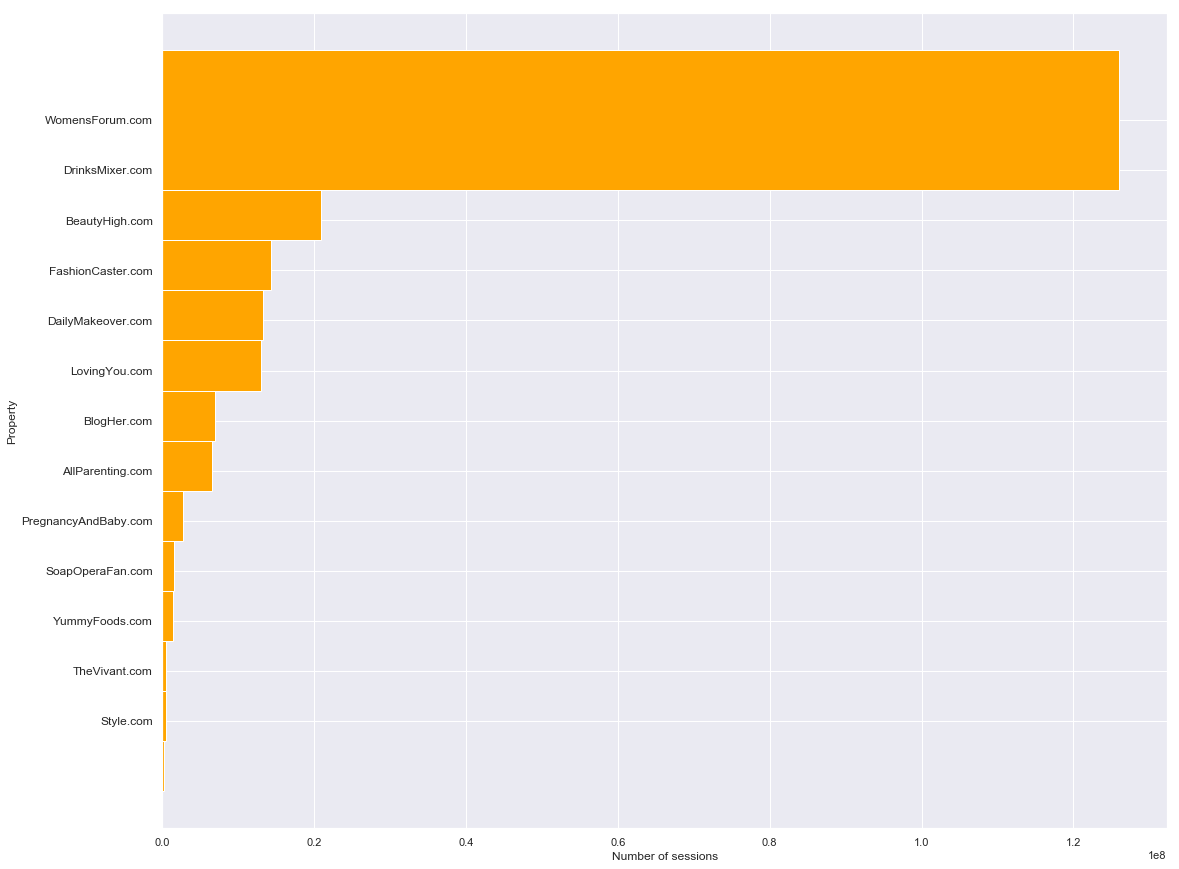

In [114]:
#GA_Subset = GA_Calendar[['Property', 'Session']]

fig = plt.figure(figsize=(18, 15), facecolor='w')
fig.subplots_adjust(wspace=0.2)

ax1 = plt.subplot(1,1,1)
barwd = 2.8
r1=range(len(GA_Subset))
ax1.barh(r1, GA_Subset.sort_values(by='Session', ascending=True).Session, height=2.8, align="center", color="orange")
ax1.set_yticks(r1)
ax1.set_yticklabels(GA_Subset.sort_values(by='Session', ascending=True).Property, size=12)
plt.xlabel('Number of sessions')
plt.ylabel('Property')
plt.show()

## Takeaway :
The number of sessions counts every user coming to your website in a certain month.We can see WomensForum has the leading audience volume.

## Users by Site by Month

In [208]:
GA_Subset2 = GA_Calendar.groupby(
   ['Property', 'Date']
).agg(
    {
         'Users':sum # get the first date per group
    }
)
GA_Subset2.head()

Users
Property         Date              
AllParenting.com 2014-01-01  361334
                 2014-02-01  333596
                 2014-03-01  331286
                 2015-01-01  752977
                 2015-02-01  682421

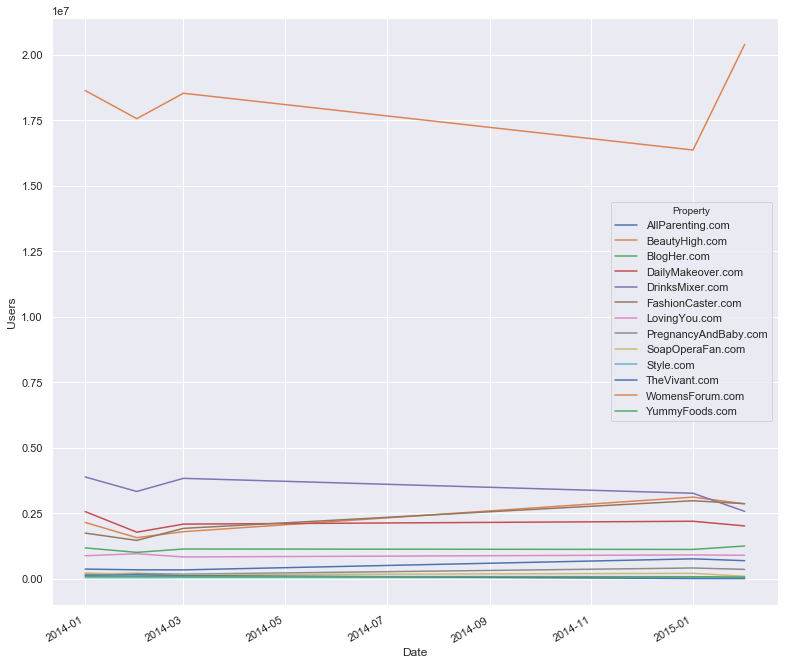

In [209]:
# plot data
fig, ax = plt.subplots(figsize=(13,12))
# use unstack()
GA_Calendar.groupby(['Date','Property']).sum()['Users'].unstack().plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Users')
plt.show()

## PageViews by Site By Month

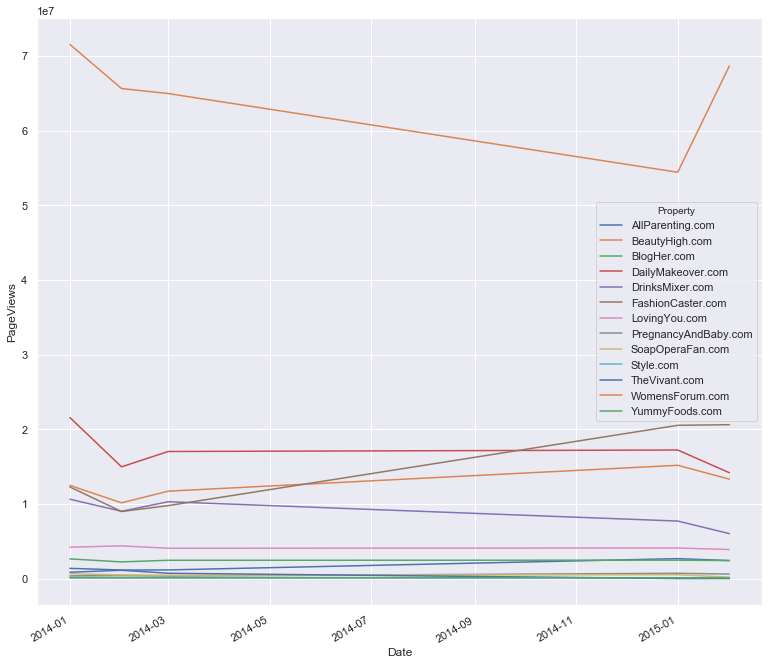

In [116]:
# plot data
fig, ax = plt.subplots(figsize=(13,12))
# use unstack()
GA_Calendar.groupby(['Date','Property']).sum()['PageViews'].unstack().plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('PageViews')
plt.show()

## Session by Device Platform

In [119]:
GAPivot1=pd.pivot_table(GA_Calendar,index=["Property"],values=["Social","Paid"],
               columns=["Date"],aggfunc=[np.sum],fill_value=0)
GAPivot1.head()

sum                                              \
                        Paid                                               
Date              2014-01-01 2014-02-01 2014-03-01 2015-01-01 2015-02-01   
Property                                                                   
AllParenting.com          18          9          7         37         30   
BeautyHigh.com          9089      18631     175256        102         74   
BlogHer.com                0          0          0          0          0   
DailyMakeover.com     307055     224197     263013        953        555   
DrinksMixer.com            0          0          0          1          0   

                                                                          
                      Social                                              
Date              2014-01-01 2014-02-01 2014-03-01 2015-01-01 2015-02-01  
Property                                                                  
AllParenting.com       88744      78805      62018      47476      42799  
BeautyHigh.com       1489204    1222411    1232061    2088917    1826825  
BlogHer.com           212865     164076     146540     148840     289853  
DailyMakeover.com     356340     303464     372313     599113     554984  
DrinksMixer.com        29605      15939      13029       9055       6881

In [155]:
# Prepare Data
GA_Device = GA_Calendar[['Year','Month','Mobile','Tablet','Desktop']]

GA_Device['Period'] = GA_Device['Year'].map(str) + '0'+ GA_Device['Month'].map(str)
GA_Device2= GA_Device.groupby(['Period'])['Mobile','Tablet','Desktop'].sum()
GA_Device2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Mobile,Tablet,Desktop
Period,,,
201401,17281964,5718999,19301256
201402,15428908,4880137,17374621
201403,17374236,17374621,18033176
201501,21449939,5088356,14822685
201502,20690268,5696061,19197948


In [162]:
GA_Device3 = GA_Device2.transpose()
GA_Device3.rename(columns={'Period': 'Device'}, inplace=True)
GA_Device3.head()

Period,201401,201402,201403,201501,201502
Mobile,17281964,15428908,17374236,21449939,20690268
Tablet,5718999,4880137,17374621,5088356,5696061
Desktop,19301256,17374621,18033176,14822685,19197948


In [170]:
# Create a column with the total arrests for each officer
GA_Device3['total_device_session'] = GA_Device3['201401'] + GA_Device3['201402'] + GA_Device3['201403']+ GA_Device3['201402'] + GA_Device3['201501']+ GA_Device3['201502']
GA_Device3

Period,201401,201402,201403,201501,201502,total_device_session
Mobile,17281964,15428908,17374236,21449939,20690268,107654223
Tablet,5718999,4880137,17374621,5088356,5696061,43638311
Desktop,19301256,17374621,18033176,14822685,19197948,106104307


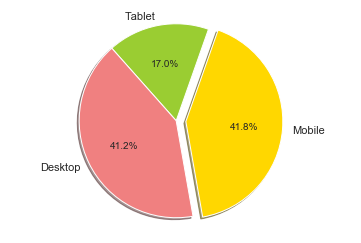

In [197]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Mobile', 'Tablet', 'Desktop'
sizes = '107654223','43638311','106104307'
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=280)

plt.axis('equal')
plt.show()

## Traffic by Top Channels by Month

In [203]:
Channels = pd.read_csv('Channels.csv')

Channels['Date'] = pd.to_datetime(Channels['Date'])
# Merged Calendar Data to Facebookmixer
Channels = pd.merge(Channels,CalendarDimension,on='Date',how='left')
Channels.head()

,Channels,Date,Session,Year,Qtr Name,Month,Mo Name,Week of Year,Wk of Month,Day of Year,HolidayIndicator
0,Baby Names Database,2014-01-01,58838,2014,Q1,1,Jan,1,1,1,New Year Day
1,Beauty,2014-01-01,14595,2014,Q1,1,Jan,1,1,1,New Year Day
2,Entertainment,2014-01-01,25476,2014,Q1,1,Jan,1,1,1,New Year Day
3,Food,2014-01-01,49131,2014,Q1,1,Jan,1,1,1,New Year Day
4,Health & Wellness,2014-01-01,247529,2014,Q1,1,Jan,1,1,1,New Year Day


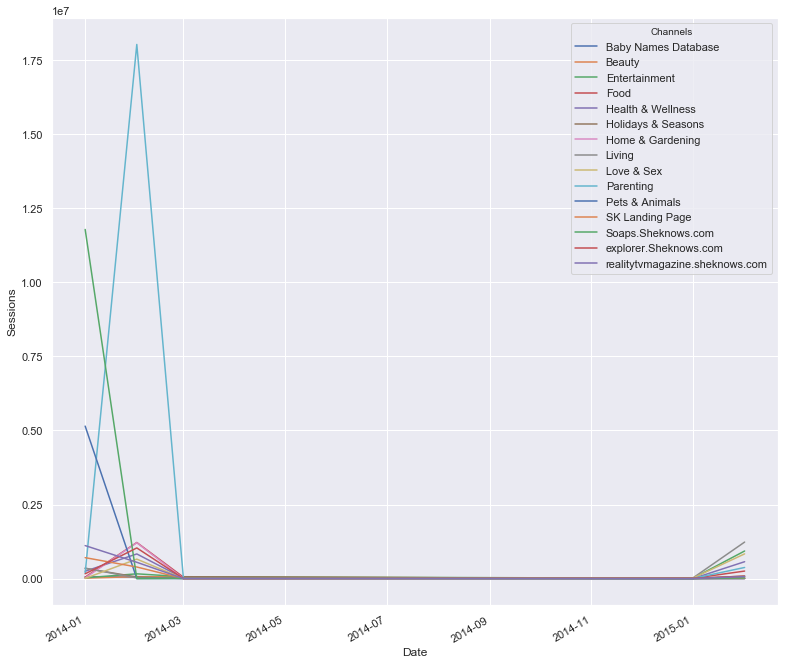

In [204]:
# plot data
fig, ax = plt.subplots(figsize=(13,12))
# use unstack()
Channels.groupby(['Date','Channels']).sum()['Session'].unstack().plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.show()

#### Takeaway : We can see there was a spike in parenting Traffic in february

#### Year on Year Growth in term of Audience Volume

In [236]:
import pandas as pd
import numpy as np

GA_YOY = pd.pivot_table(GA_Calendar,index=["Property"],values=["Session"],
               columns=["Date"],aggfunc=[np.sum])
GA_YOY

sum                                            
                        Session                                            
Date                 2014-01-01 2014-02-01 2014-03-01 2015-01-01 2015-02-01
Property                                                                   
AllParenting.com         405277     373122     368529     856114     776284
BeautyHigh.com          2680094    2052520    2302205    3777273    3495611
BlogHer.com             1370172    1157290    1297681    1262918    1384577
DailyMakeover.com       3132555    2197575    2598546    2613347    2385530
DrinksMixer.com         4761748    4099569    4775296    4063707    3225749
FashionCaster.com       2131002    1780877    2334093    3563731    3398485
LovingYou.com           1373026    1450059    1329808    1412895    1361585
PregnancyAndBaby.com     198694     227270     193068     485785     422423
SoapOperaFan.com         364220     275417     259471     329770     130766
Style.com                 44033      38175      44766      41712      39068
TheVivant.com            134267     154841     124940          7         11
WomensForum.com        25612320   23779292   24838182   22874476   28897944
YummyFoods.com            94811      97659      87441      79245      66244

In [246]:
YOY = pd.read_csv('YOY.csv')
YOY= YOY[['Property', '201401','201501']]

YOY['YOY'] = (YOY['201501'] - YOY['201401'])
YOY['YOY_PercChange'] = (YOY['YOY']/YOY['201401'])*100
YOY

,Property,201401,201501,YOY,YOY_PercChange
0,AllParenting.com,405277,856114,450837,111.241694
1,BeautyHigh.com,2680094,3777273,1097179,40.938079
2,BlogHer.com,1370172,1262918,-107254,-7.827776
3,DailyMakeover.com,3132555,2613347,-519208,-16.574585
4,DrinksMixer.com,4761748,4063707,-698041,-14.659344
5,FashionCaster.com,2131002,3563731,1432729,67.232645
6,LovingYou.com,1373026,1412895,39869,2.903732
7,PregnancyAndBaby.com,198694,485785,287091,144.489013
8,SoapOperaFan.com,364220,329770,-34450,-9.458569
9,Style.com,44033,41712,-2321,-5.271047


#### User Volume 

In [250]:
GA_User_YOY = pd.pivot_table(GA_Calendar,index=["Property"],values=["Session"],
               columns=["Date"],aggfunc=[np.sum])
YOY_user = pd.read_csv('GA_User_YOY.csv')
YOY_user= YOY_user[['Property', '201401','201501']]

YOY_user['YOY'] = (YOY_user['201501'] - YOY_user['201401'])
YOY_user['YOY_PercChange'] = (YOY_user['YOY']/YOY_user['201401'])*100
YOY_user

,Property,201401,201501,YOY,YOY_PercChange
0,AllParenting.com,405277.0,776284.0,371007.0,91.544055
1,BeautyHigh.com,2680094.0,3495611.0,815517.0,30.428672
2,BlogHer.com,1370172.0,1384577.0,14405.0,1.051328
3,DailyMakeover.com,3132555.0,2385530.0,-747025.0,-23.847147
4,DrinksMixer.com,4761748.0,3225749.0,-1535999.0,-32.257041
5,FashionCaster.com,2131002.0,3398485.0,1267483.0,59.478264
6,LovingYou.com,1373026.0,1361585.0,-11441.0,-0.833269
7,PregnancyAndBaby.com,198694.0,422423.0,223729.0,112.599777
8,SoapOperaFan.com,364220.0,130766.0,-233454.0,-64.096974
9,Style.com,44033.0,39068.0,-4965.0,-11.275634


## Conclusion : There is a positive growth in terms of Audience volume among the top properties ,Which is good news for stakeholders